# **Importing Libraries**

In [356]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import joblib

# **Dataset Collection and Understanding**

## 1. Loading the dataset

In [357]:
df=pd.read_csv('https://github.com/Jan2309jr/Shopper-Spectrum/raw/refs/heads/main/online_retail.csv')

## 2. First View of dataset

In [358]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047.0,United Kingdom


## 3. Dataset Rows and Columns Count 

In [359]:
row,col=df.shape
print("Rows:",row)
print("cols",col)

Rows: 541909
cols 8


## 4. Dataset Information

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 5. Columns Names

In [361]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## 6. Null/Missing values

In [362]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 5. Unique Values

In [363]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 6. Dataset Description 

In [364]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 7. Visualisation of Dataset

### i. Missing Values in each Column

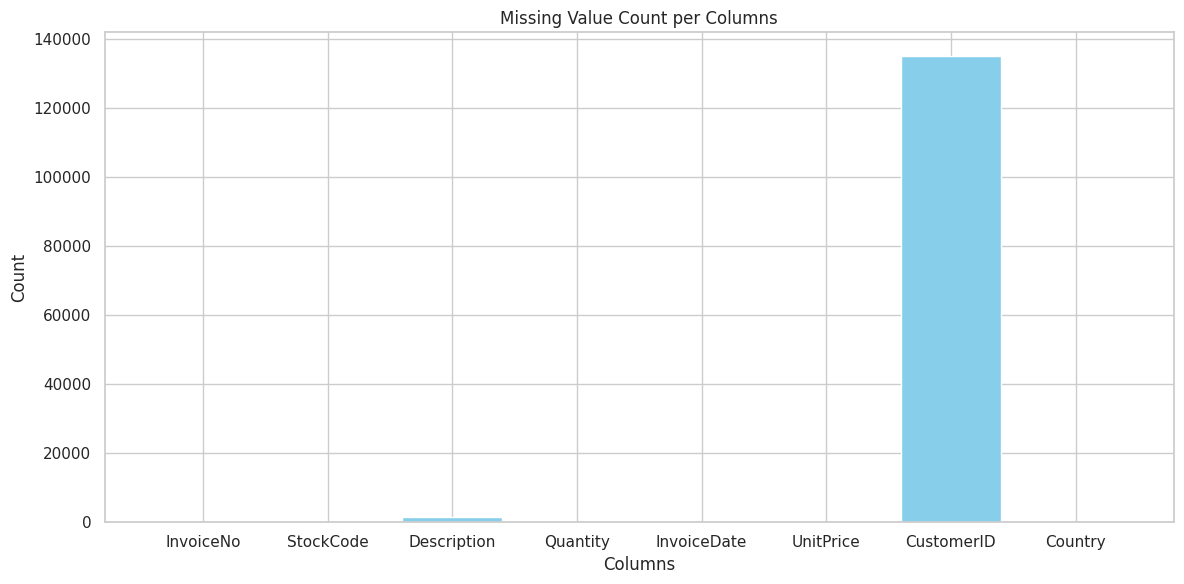

In [365]:
columns=df.columns.tolist()
nullValues=df.isnull().sum()
plt.figure(figsize=(12,6))
plt.bar(columns,nullValues,color="skyblue")
plt.title("Missing Value Count per Columns")
plt.xlabel('Columns')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### ii. Unique Values in each Column

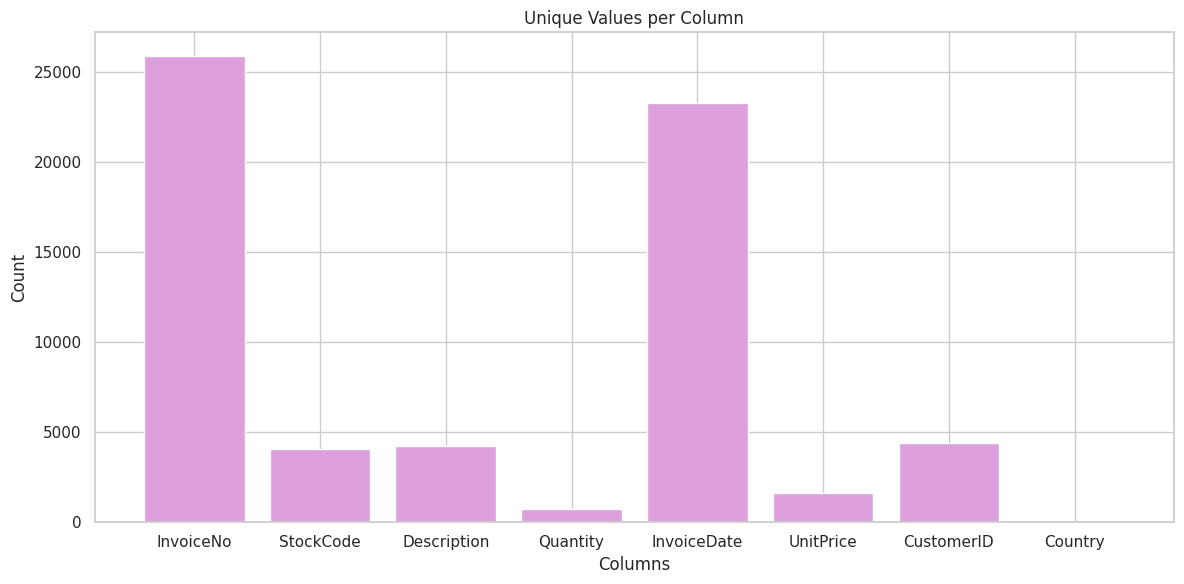

In [366]:
uniqueValues= df.nunique()
plt.figure(figsize=(12,6))
plt.bar(columns,uniqueValues,color='plum')
plt.title("Unique Values per Column")
plt.xlabel('Columns')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

## 1. Handling Missing Values

In [367]:
df.dropna(subset=['CustomerID'], inplace=True)
df.dropna(subset=['Description'], inplace=True)

## 2. Excluding Cancelled Invoices

In [368]:
#dropping rows where invoice value = 'c' (cancelled)
df.drop(df[df['InvoiceNo'].str.startswith('C')].index, inplace=True)

## 3. Removing Invalid Prices and Quantities

In [369]:
df.drop(df[df["UnitPrice"]<=0].index,inplace=True)
df.drop(df[df["Quantity"]<=0].index,inplace=True)

## 4. Standardizing Data

In [370]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

## 5. Creating new Columns

In [371]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [372]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


# **Exploratory Data Analysis (EDA)**

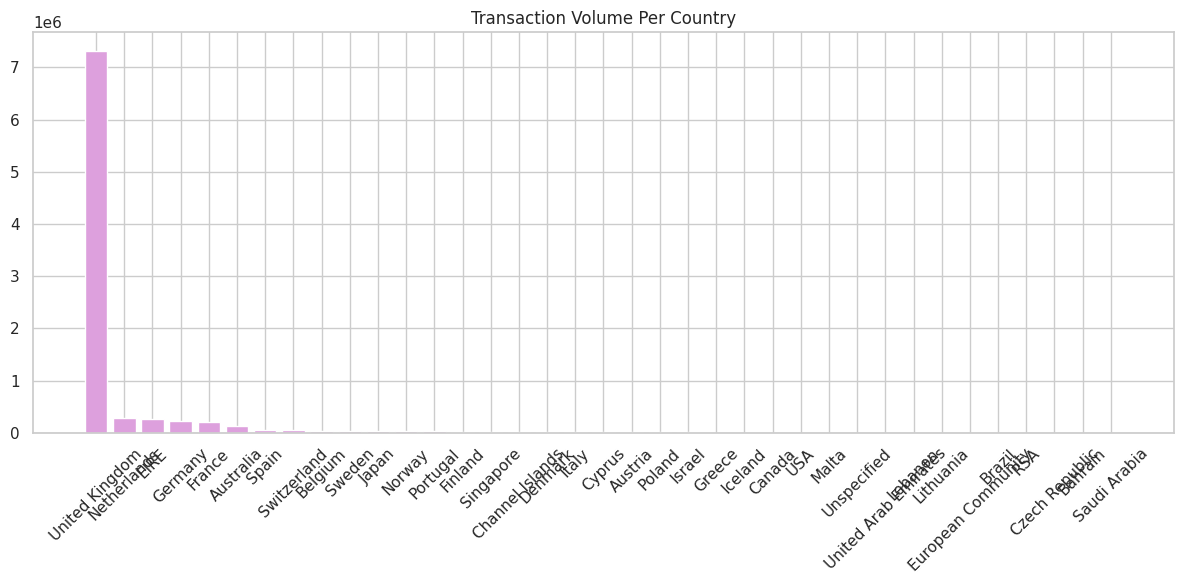

In [373]:
# Grouping and aggregating
country_total = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
# Plotting
plt.figure(figsize=(12,6))
plt.bar(country_total.index, country_total.values, color="plum")
plt.title('Transaction Volume Per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

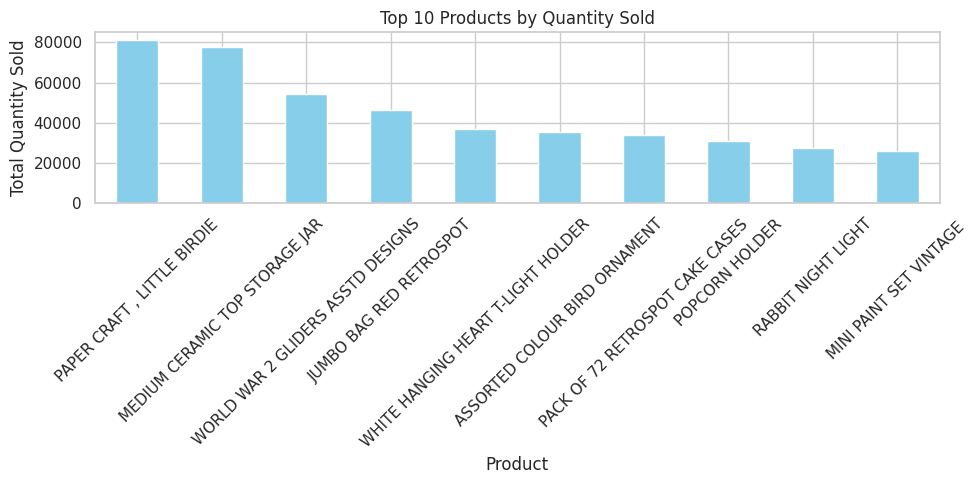

In [374]:
# Top Products by Quantity Sold
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(10,5))
top_products_qty.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


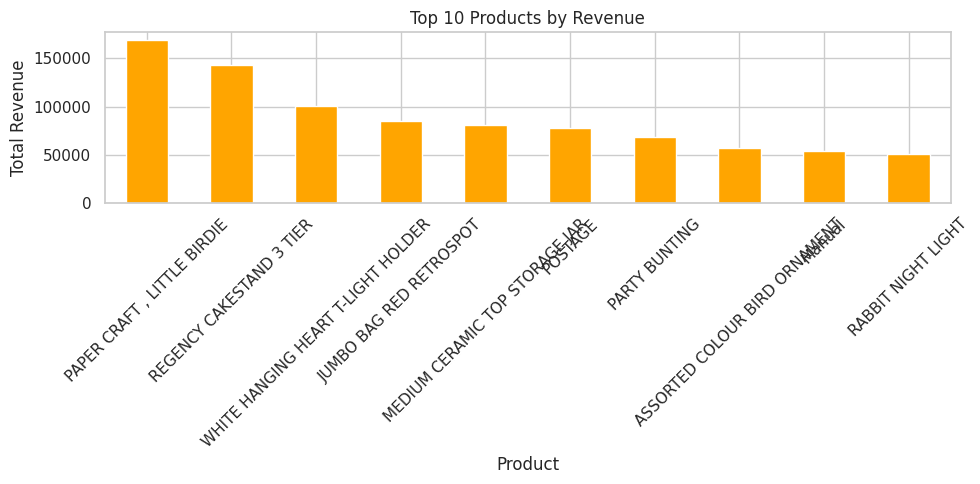

In [375]:
#  Top Products by Revenue
top_products_rev = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
#plot
plt.figure(figsize=(10,5))
top_products_rev.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


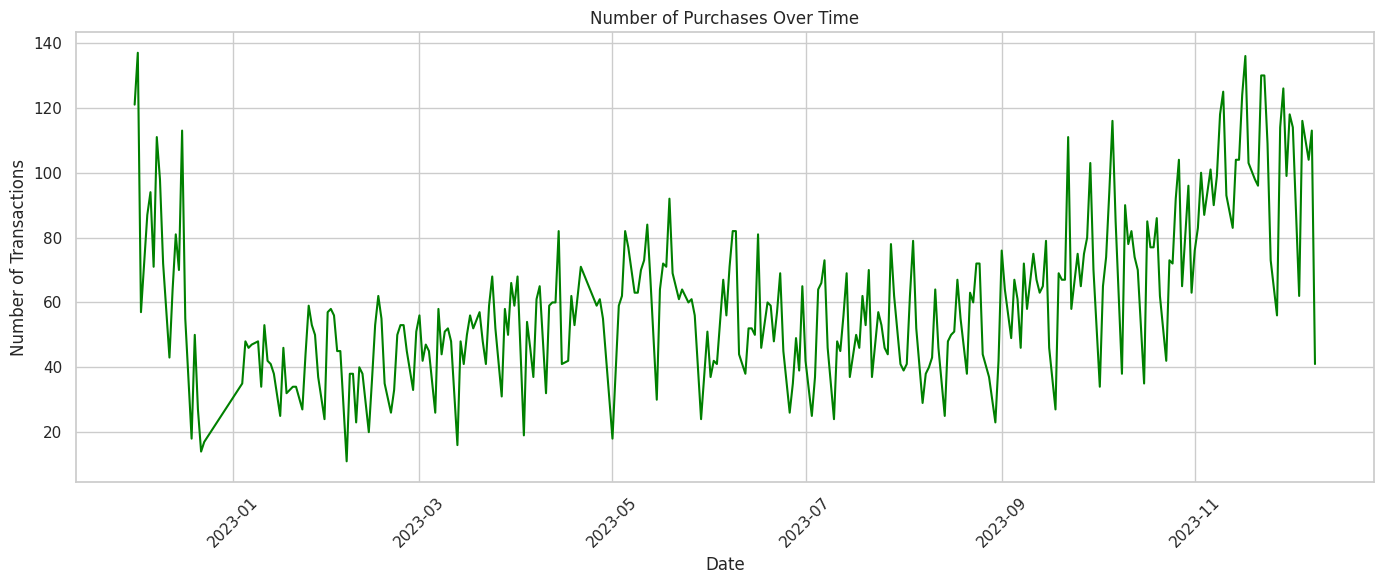

In [376]:
# Number of Purchases Over Time
purchase_trend = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique()
#plot
plt.figure(figsize=(14,6))
plt.plot(purchase_trend.index, purchase_trend.values, color='green')
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


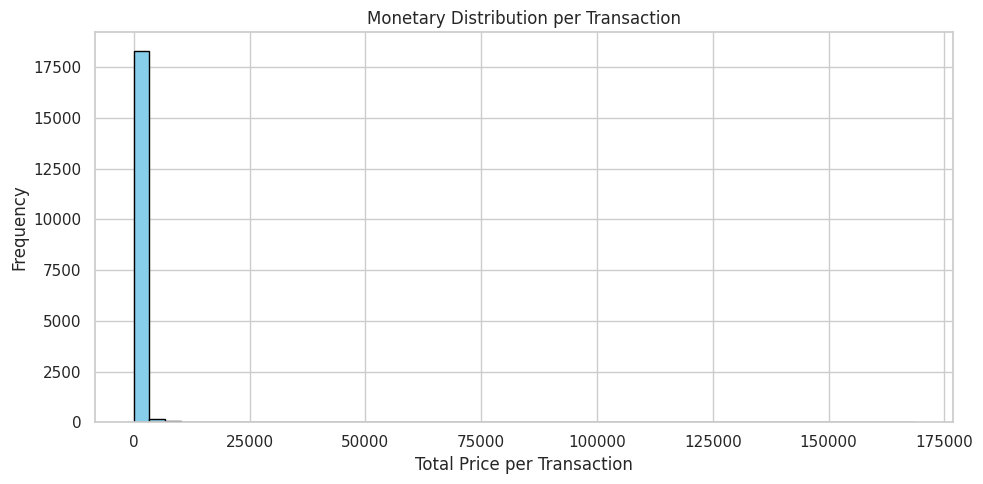

In [377]:
# Monetary Distribution per Transaction (Invoice)
# Total value per transaction
transaction_value = df.groupby('InvoiceNo')['TotalPrice'].sum()

# Histogram
plt.figure(figsize=(10,5))
plt.hist(transaction_value, bins=50, color='skyblue', edgecolor='black')
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Total Price per Transaction')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


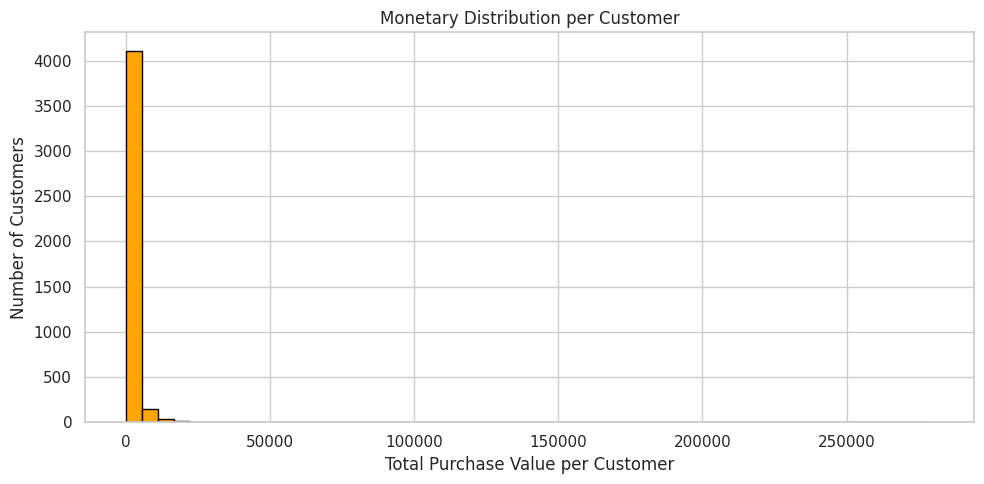

In [378]:
# Monetary Distribution per Customer
# Total value per customer
customer_value = df.groupby('CustomerID')['TotalPrice'].sum()

# Histogram
plt.figure(figsize=(10,5))
plt.hist(customer_value, bins=50, color='orange', edgecolor='black')
plt.title('Monetary Distribution per Customer')
plt.xlabel('Total Purchase Value per Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()



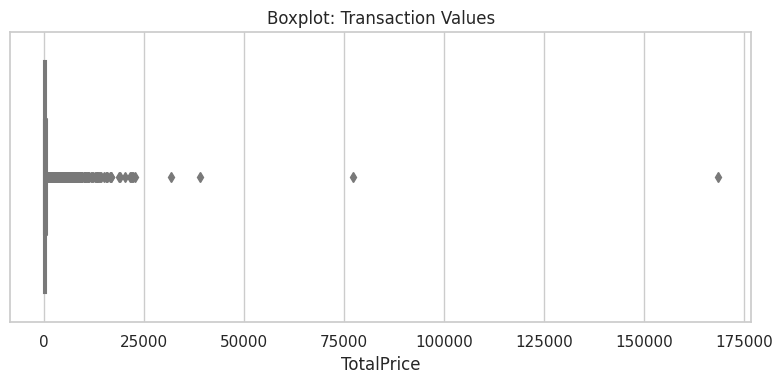

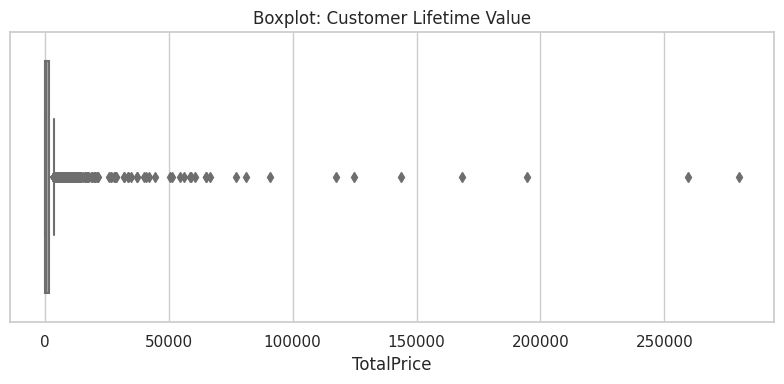

In [379]:
# Boxplot for transactions
plt.figure(figsize=(8,4))
sns.boxplot(x=transaction_value, color='lightblue')
plt.title('Boxplot: Transaction Values')
plt.tight_layout()
plt.show()

# Boxplot for customers
plt.figure(figsize=(8,4))
sns.boxplot(x=customer_value, color='lightcoral')
plt.title('Boxplot: Customer Lifetime Value')
plt.tight_layout()
plt.show()


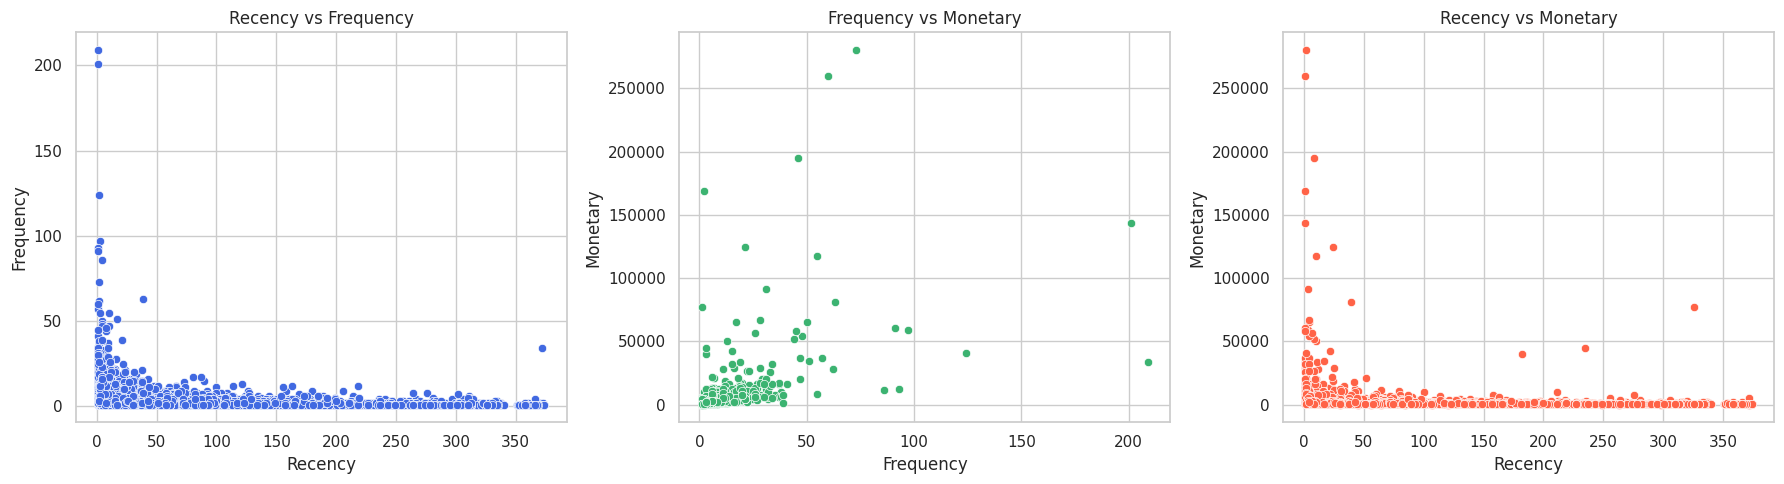

In [380]:
#rfm distribution

# 1. Convert InvoiceDate to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Create RFM table
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

# 3. Plot RFM Scatter Plots
plt.figure(figsize=(18, 5))

# Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', color='royalblue')
plt.title('Recency vs Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', color='mediumseagreen')
plt.title('Frequency vs Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', color='tomato')
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

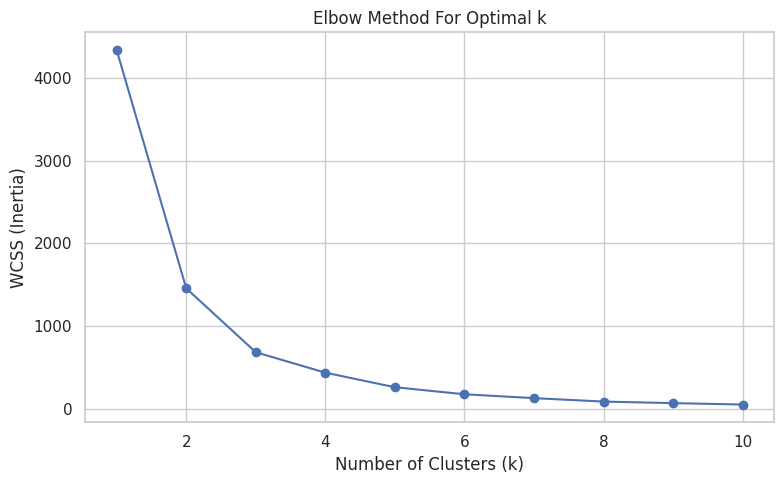

In [381]:
#Elbow curve for cluster selection

# Grouping by customer to get their total transaction amount
customer_df = df.groupby('CustomerID')[['TotalPrice']].sum().reset_index()

# Remove NaN (some rows might have null CustomerID)
customer_df = customer_df.dropna()

# Feature scaling (always scale before clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[['TotalPrice']])

# Elbow method: WCSS for different k
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


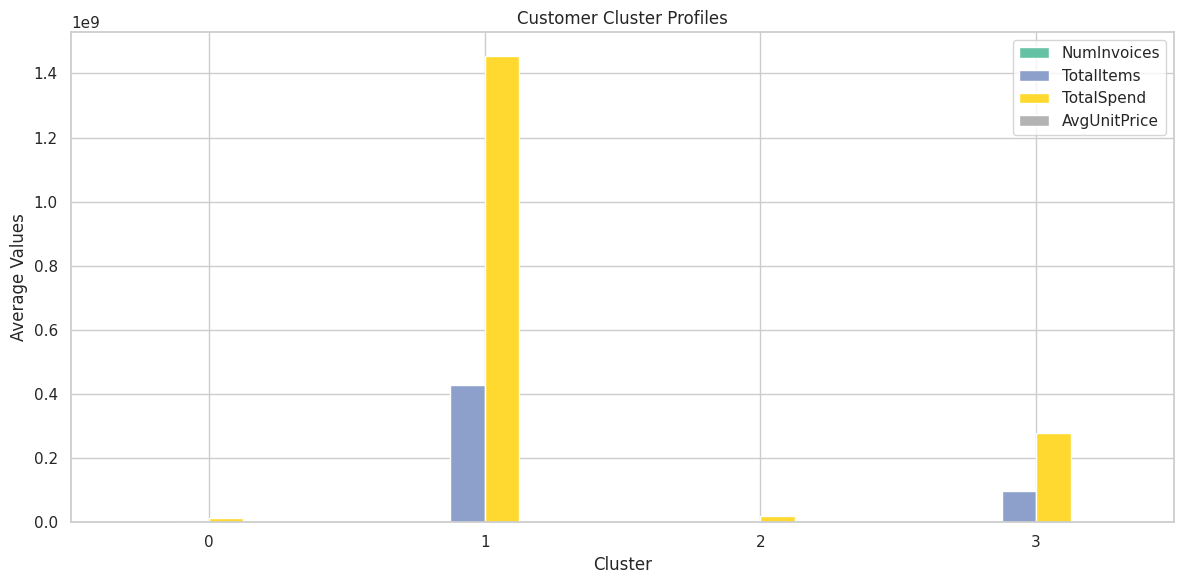

In [382]:
#Customer cluster profiles

# Step 1: Aggregate customer-level features
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',             # num of invoices
    'Quantity': 'sum',                  # total items bought
    'TotalPrice': 'sum',                # total spend
    'UnitPrice': 'mean'                 # avg price per item
}).rename(columns={
    'InvoiceNo': 'NumInvoices',
    'Quantity': 'TotalItems',
    'TotalPrice': 'TotalSpend',
    'UnitPrice': 'AvgUnitPrice'
}).dropna()

# Step 2: Normalize
scaler = StandardScaler()
scaled = scaler.fit_transform(customer_df)

# Step 3: KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled)

# Step 4: Plot cluster profiles (mean values per feature)
cluster_profiles = customer_df.groupby('Cluster').mean()

# Optional: unscale for readability
cluster_profiles_unscaled = scaler.inverse_transform(cluster_profiles.drop(columns='Cluster', errors='ignore'))
cluster_profiles = pd.DataFrame(cluster_profiles_unscaled, columns=['NumInvoices', 'TotalItems', 'TotalSpend', 'AvgUnitPrice'])

# Step 5: Visualization
cluster_profiles.plot(kind='bar', figsize=(12,6), colormap='Set2')
plt.title("Customer Cluster Profiles")
plt.xlabel("Cluster")
plt.ylabel("Average Values")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

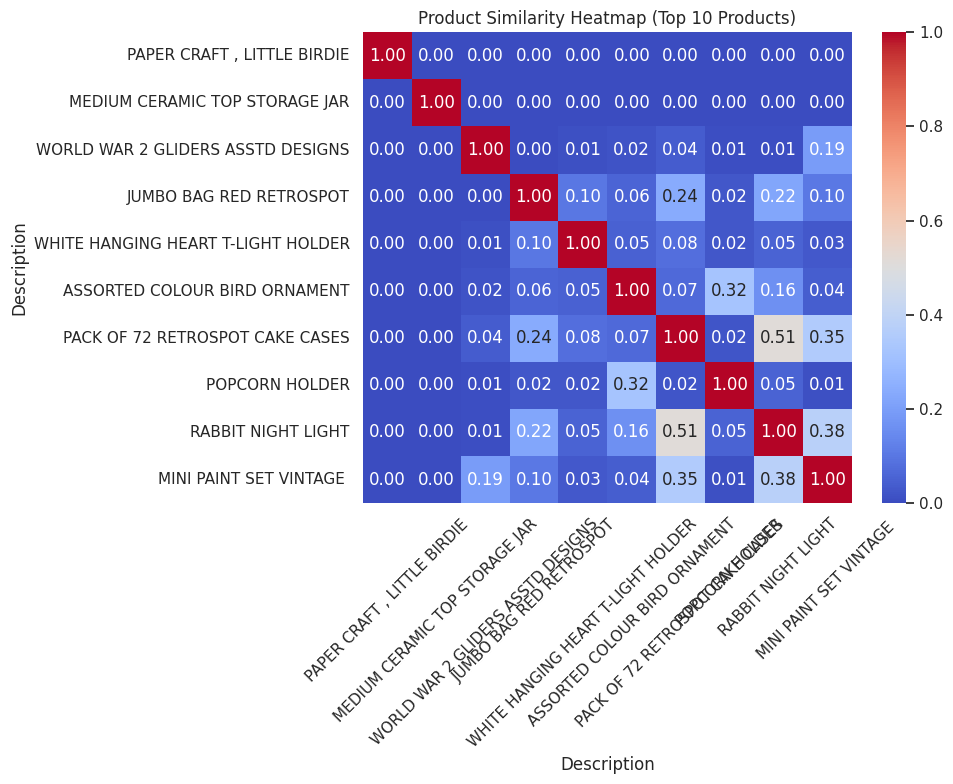

In [383]:
#Product recommendation heatmap / similarity matrix

# --- 1. Load your data ---
# Assuming df is already your DataFrame

# --- 2. Create Product-Customer Matrix ---
# Rows = Products, Columns = Customers, Values = Quantity
product_customer_matrix = df.pivot_table(index='Description', 
                                         columns='CustomerID', 
                                         values='Quantity', 
                                         aggfunc='sum', 
                                         fill_value=0)

# --- 3. Compute Cosine Similarity ---
similarity_matrix = cosine_similarity(product_customer_matrix)

# Convert to DataFrame for labeling
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=product_customer_matrix.index, 
                             columns=product_customer_matrix.index)

# --- 4. (Optional) Reduce to top N products for readability ---
top_n = 10
top_products = product_customer_matrix.sum(axis=1).nlargest(top_n).index
similarity_df_top = similarity_df.loc[top_products, top_products]

# --- 5. Plot Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df_top, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Product Similarity Heatmap (Top 10 Products)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Clustering Methodology**

# 1.Feature Engineering

In [384]:
#Reference data
reference_date = df['InvoiceDate'].max()

### i. RFM calculation

In [385]:
# Set reference date as the latest date in your data
reference_date = df['InvoiceDate'].max()

# Group by CustomerID and calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [386]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


### ii. Standardization RFM values (Z-Score scaling)

In [387]:
standard_scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df['CustomerID'] = rfm['CustomerID'].values

### iii. Normalization (Min-Max Scaling)

In [388]:
minmax_scaler = MinMaxScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_normalized_df = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'])
rfm_normalized_df['CustomerID'] = rfm['CustomerID'].values

### iv. Choosing Clustering Algorithm

#### 1. KMeans Clustering

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

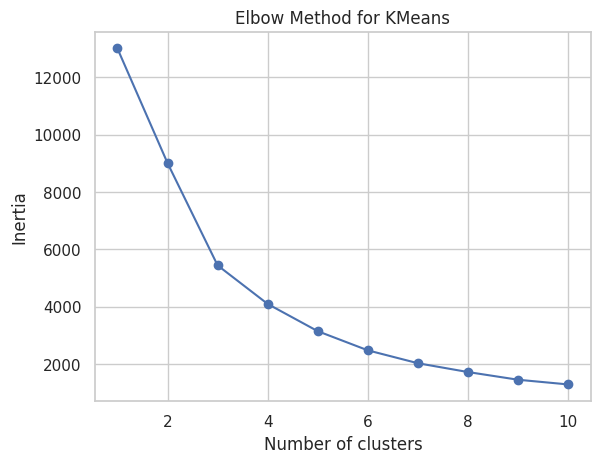

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [389]:
# Elbow method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

# Final KMeans model (pick k based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)

#### 2.  DBSCAN Clustering

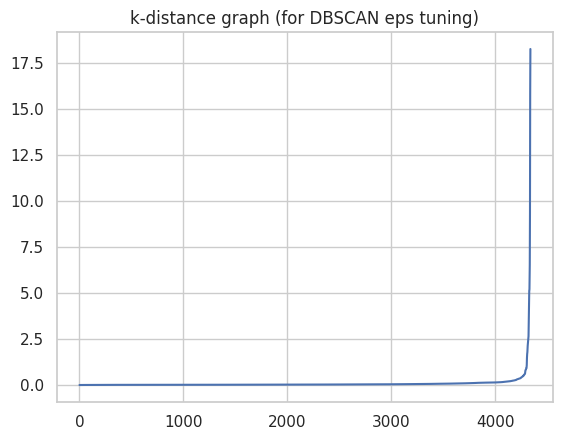

In [390]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(rfm_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_scaled)
distances = np.sort(distances[:, 4])  # 5th nearest neighbor

plt.plot(distances)
plt.title('k-distance graph (for DBSCAN eps tuning)')
plt.show()

# DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=5)  # tweak eps as needed
dbscan_labels = dbscan.fit_predict(rfm_scaled)

#### 3. Hierarchical Clustering

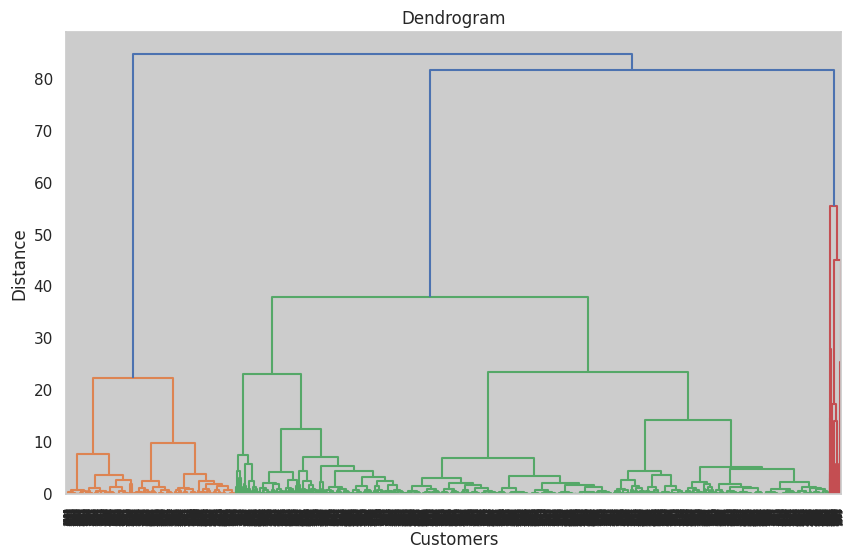

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [391]:
# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(rfm_scaled)

In [392]:
# Assuming `rfm_scaled` is your standardized RFM data
inertias = []
silhouette_scores = []
K = range(2, 11)  # Start from 2, since silhouette isn't valid for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

### v. Deciding the number of clusters

#### 1. Elbow Method

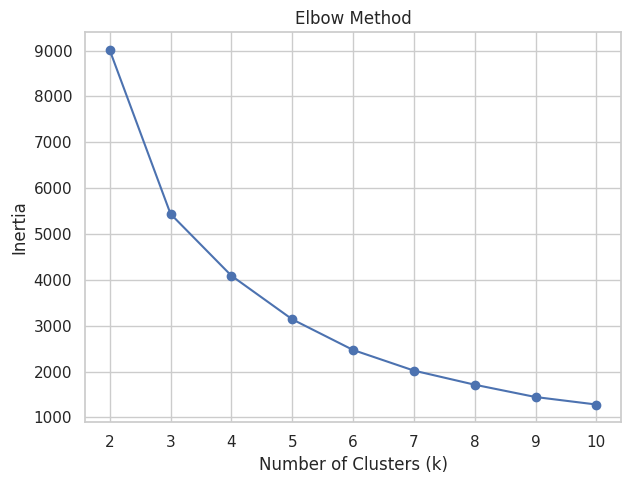

In [393]:
# Plot Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.tight_layout()
plt.show()

#### 2. Silhouette Score

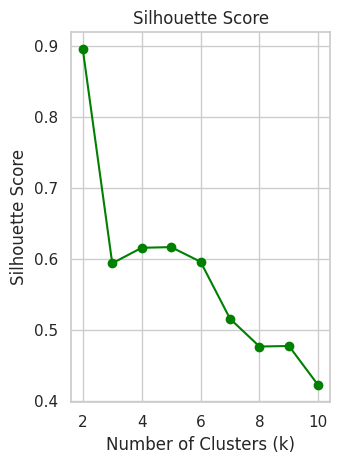

In [394]:
# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

### vi. Running the Cluster

#### 1. KMeans Clustering

In [395]:
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 2. Hierarchical Clustering

In [396]:
agglo = AgglomerativeClustering(n_clusters=4)
rfm['Agglo_Cluster'] = agglo.fit_predict(rfm_scaled)

#### 3. DBSCAN Clustering

In [397]:
dbscan = DBSCAN(eps=0.9, min_samples=5)  # tweak eps based on k-distance graph
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

In [398]:
def print_rfm_table(label_name):
    print("------------")
    print(f"\n RFM Cluster Summary: {label_name}")
    display(
        rfm.groupby(label_name)[['Recency', 'Frequency', 'Monetary']].mean().round(2)
        .sort_values(by='Monetary', ascending=False)
    )
print_rfm_table('KMeans_Cluster')
print_rfm_table('Agglo_Cluster')
print_rfm_table('DBSCAN_Cluster')

------------

 RFM Cluster Summary: KMeans_Cluster


,Recency,Frequency,Monetary
KMeans_Cluster,,,
2,6.38,82.54,127338.31
1,14.67,22.05,12453.23
3,42.92,3.66,1350.14
0,247.56,1.55,478.11


------------

 RFM Cluster Summary: Agglo_Cluster


,Recency,Frequency,Monetary
Agglo_Cluster,,,
1,10.00,43.88,164658.50
0,23.93,43.79,31348.39
2,45.21,4.31,1625.46
3,258.54,1.49,457.31


------------

 RFM Cluster Summary: DBSCAN_Cluster


,Recency,Frequency,Monetary
DBSCAN_Cluster,,,
-1,38.61,56.09,75805.92
0,91.94,3.87,1488.92


### vii. Visualizing the RFM values for each Algorithm

Plot for KMeans Clustering


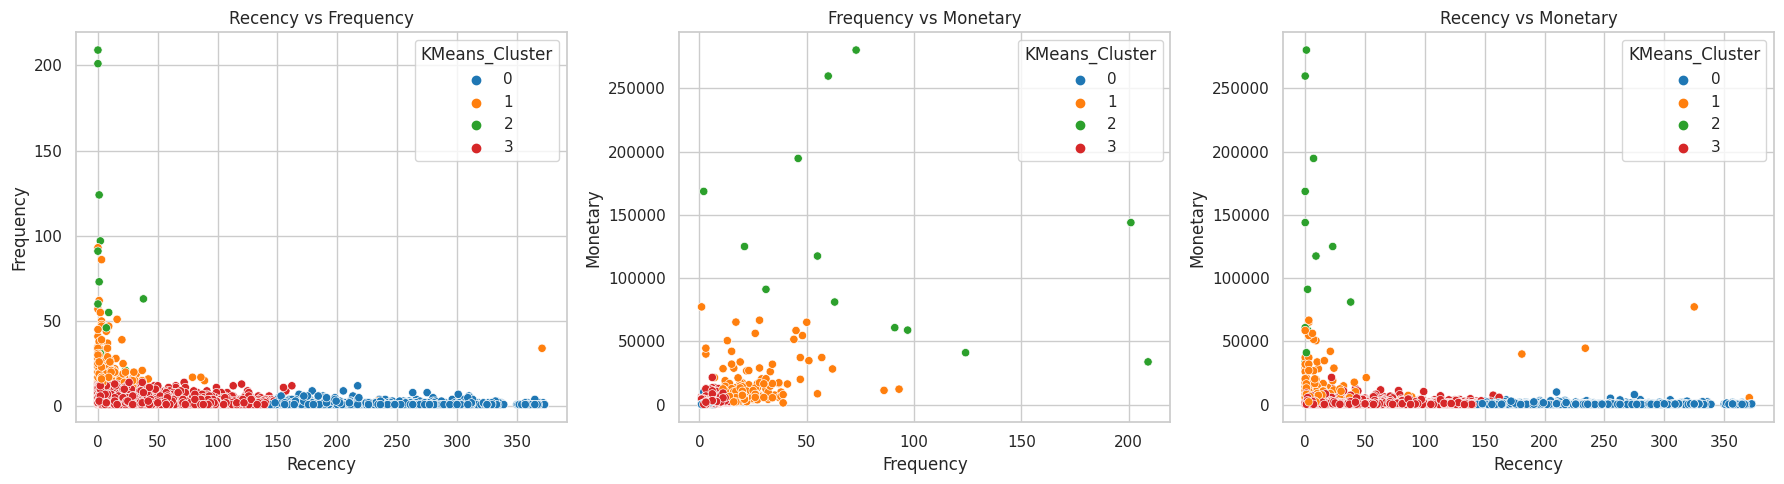

In [399]:
# Set style
sns.set(style="whitegrid")

# Replace 'Cluster' with 'KMeans_Cluster' if that's your column
cluster_col = 'KMeans_Cluster'
print("Plot for KMeans Clustering")
plt.figure(figsize=(18, 5))
# Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue=cluster_col, palette='tab10')
plt.title('Recency vs Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue=cluster_col, palette='tab10')
plt.title('Frequency vs Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue=cluster_col, palette='tab10')
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

Plot for Agglo_Cluster


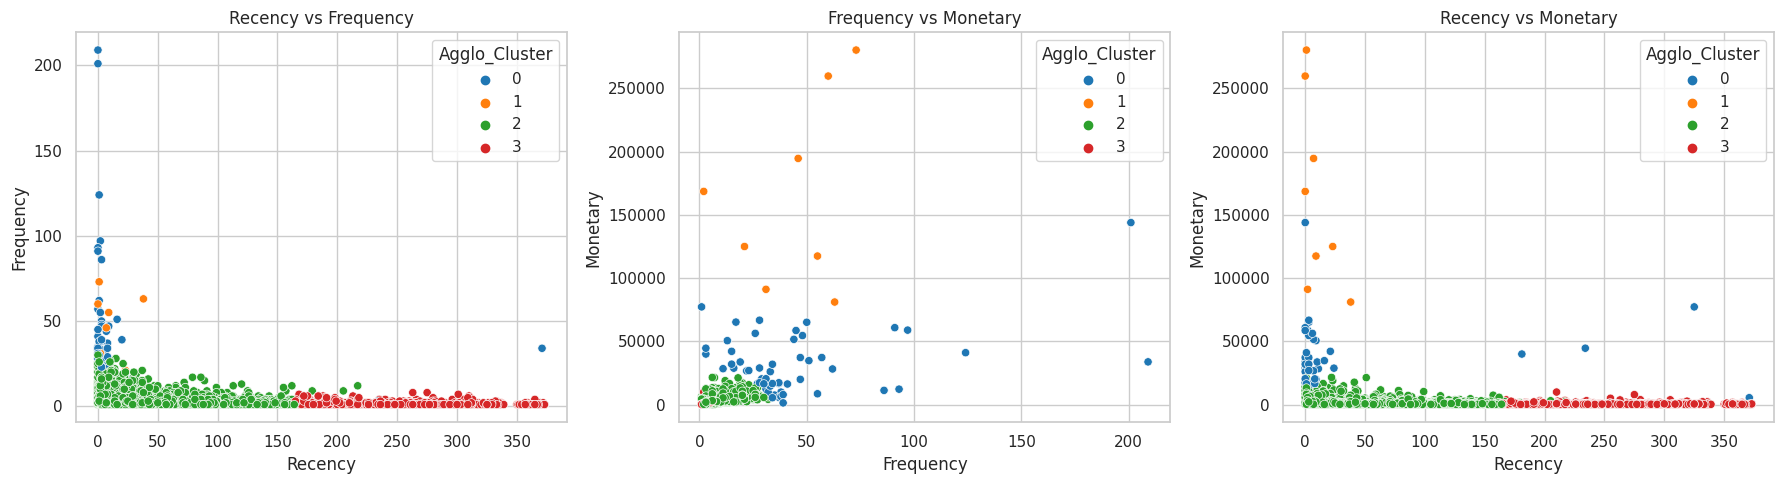

In [400]:
# Set style
sns.set(style="whitegrid")

# Replace 'Cluster' with 'KMeans_Cluster' if that's your column
cluster_col = 'Agglo_Cluster'
print("Plot for Agglo_Cluster")
plt.figure(figsize=(18, 5))
# Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue=cluster_col, palette='tab10')
plt.title('Recency vs Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue=cluster_col, palette='tab10')
plt.title('Frequency vs Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue=cluster_col, palette='tab10')
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

Plot for DBSCAN_Cluster


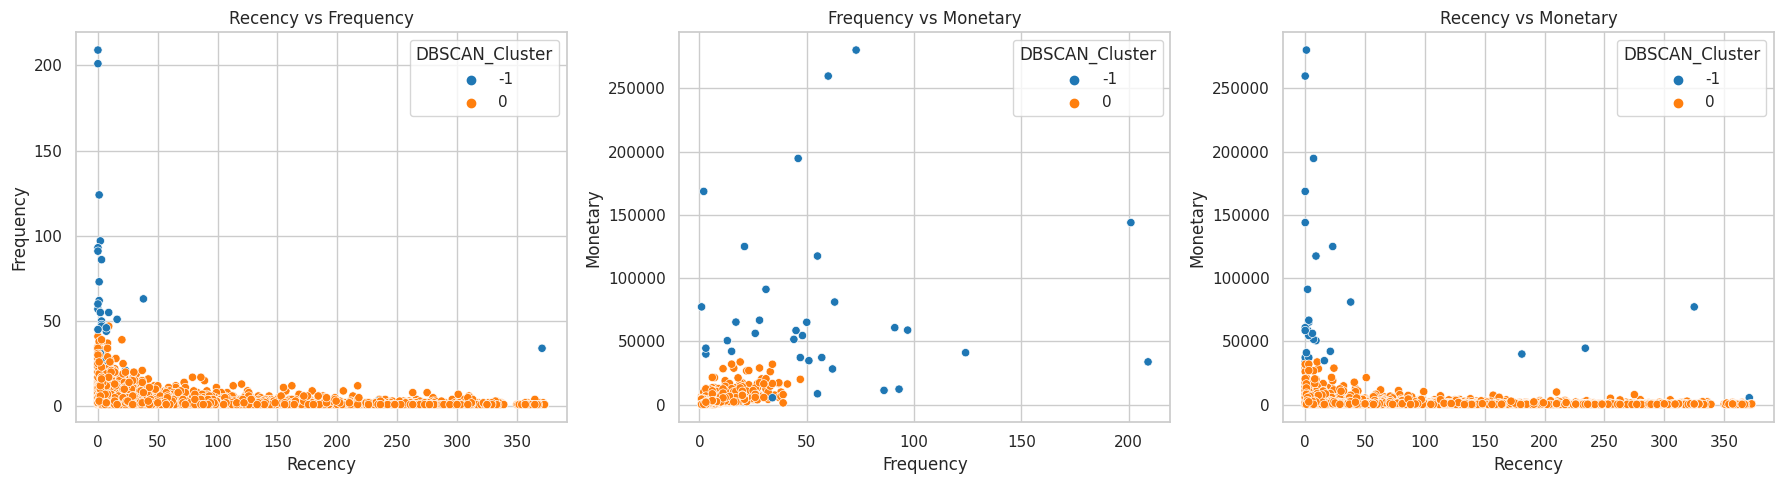

In [401]:
# Set style
sns.set(style="whitegrid")

# Replace 'Cluster' with 'KMeans_Cluster' if that's your column
cluster_col = 'DBSCAN_Cluster'
print("Plot for DBSCAN_Cluster")
plt.figure(figsize=(18, 5))
# Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue=cluster_col, palette='tab10')
plt.title('Recency vs Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue=cluster_col, palette='tab10')
plt.title('Frequency vs Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue=cluster_col, palette='tab10')
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

# **Saving My Model**

In [402]:
# Save model
joblib.dump(kmeans, '/kaggle/working/kmeans_model.pkl')

['kmeans_model.pkl']

In [403]:
joblib.dump(minmax_scaler, '/kaggle/working/rfm_minmax_scaler.pkl')

['rfm_minmax_scaler.pkl']

In [404]:
joblib.dump(standard_scaler, '/kaggle/working/rfm_standard_scaler.pkl')

['rfm_standard_scaler.pkl']